In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files

In [2]:
all_scores = {} # model A layer : dict of scores to other layers in model B
model_A_layers = list(range(1,6))
for layer_id in model_A_layers:
    with open(f'pythia70m_L{layer_id}_pythia160m_multL.pkl', "rb") as f:
        layer_to_dictscores = pickle.load(f)
        all_scores[layer_id] = layer_to_dictscores

In [ ]:
all_scores[2][3]

{'mean_actv_corr': 0.7650287390695212,
 'num_feat_kept': 3152,
 'num_feat_A_unique': 3152,
 'mean_actv_corr_filt': 0.5637133971665074,
 'svcca_paired': 0.34845414089170185,
 'svcca_rand_mean': 0.015895654806839073,
 'svcca_rand_pval': 0.0,
 'rsa_paired': 0.11002849701138158,
 'rsa_rand_mean': -0.00015539466820164776,
 'rsa_rand_pval': 0.0}

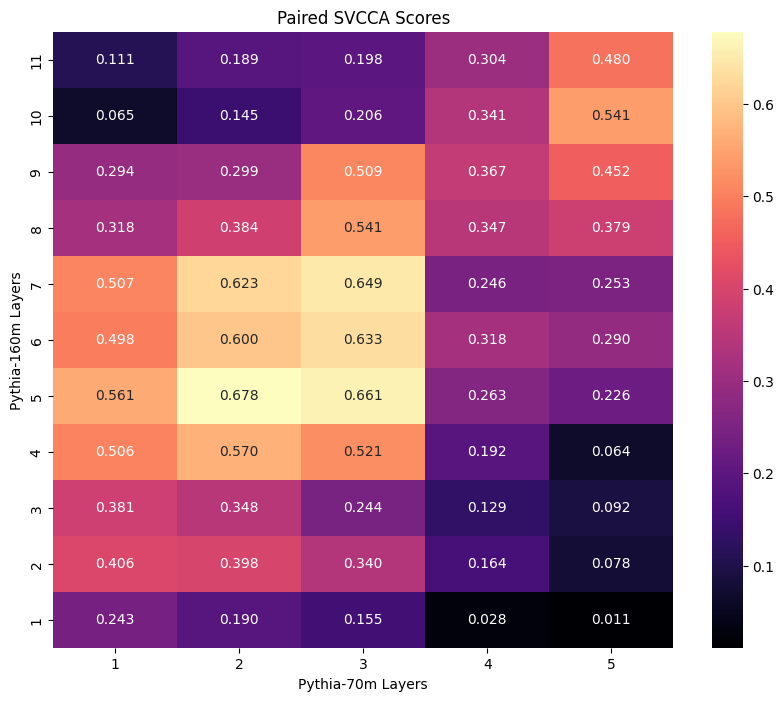

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

all_scores_paired_svcca = {}

for layerID_A, layer_to_dictscores in all_scores.items():
    layerID_A_scores = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0:
            score = scores_dict['svcca_paired']
            layerID_A_scores[layerID_B] = score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores

import pandas as pd
scores_df = pd.DataFrame(all_scores_paired_svcca)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(scores_df, annot=True, cmap='magma', cbar=True, fmt=".3f")
plt.title("Paired SVCCA Scores")
plt.xlabel("Pythia-70m Layers")
plt.ylabel("Pythia-160m Layers")

ax.invert_yaxis()
plt.show()

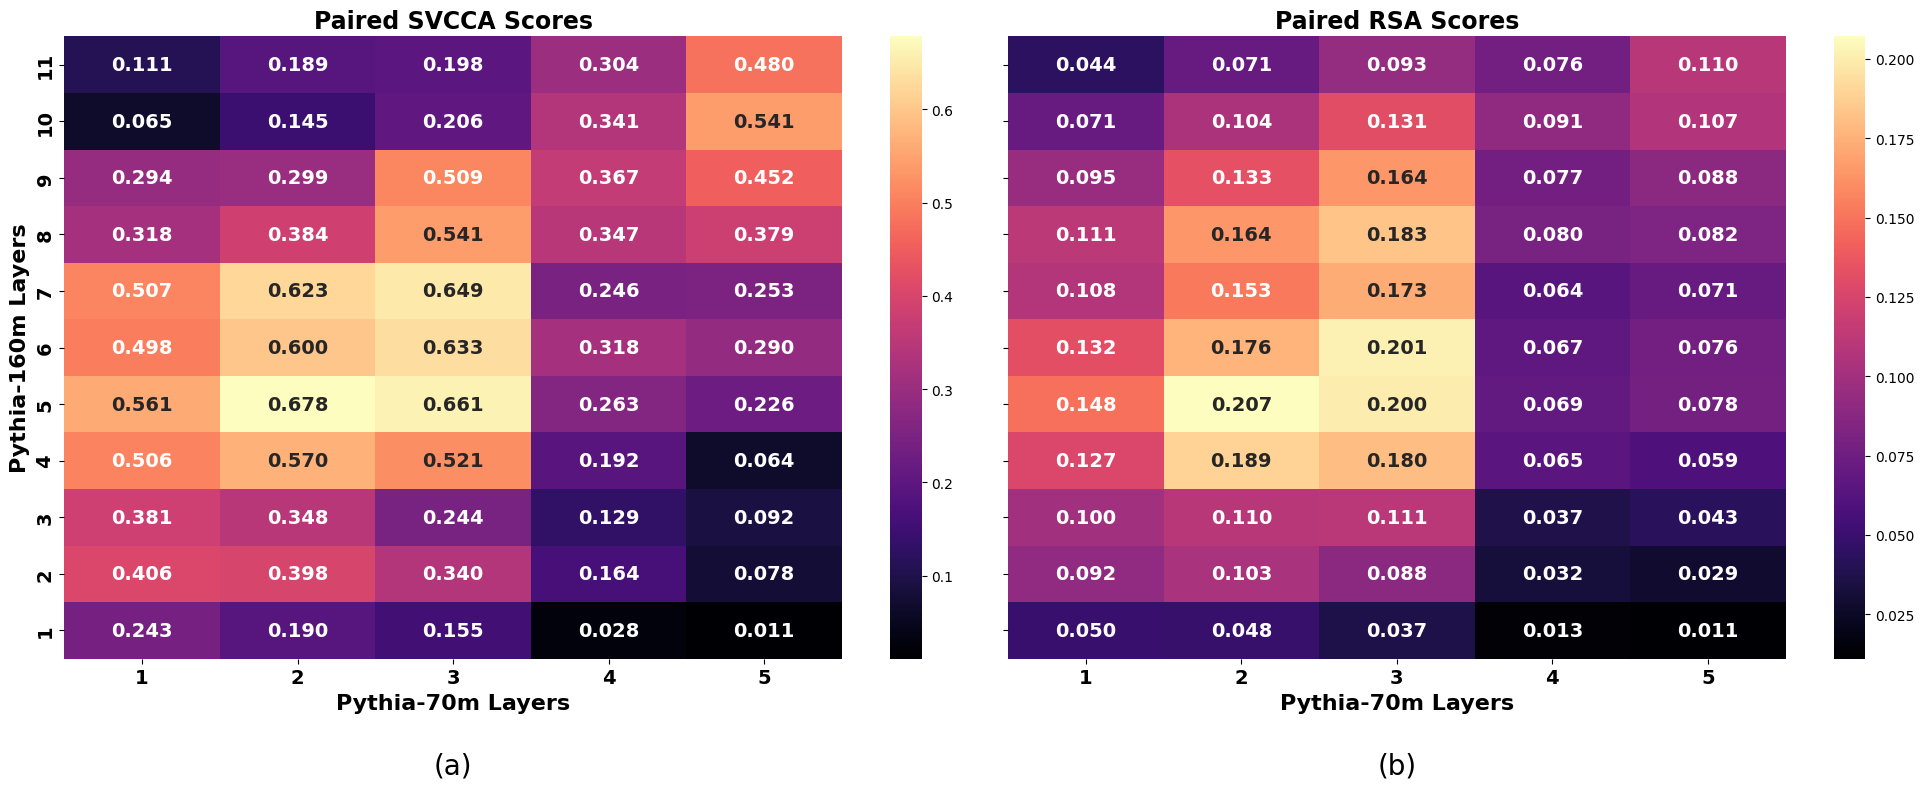

In [ ]:
# Initialize dictionaries for the different scores
all_scores_paired_svcca = {}
all_scores_paired_rsa = {}

# Extract scores from the data structure
for layerID_A, layer_to_dictscores in all_scores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    layerID_A_scores_rsa = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0 and layerID_B != 25:
            svcca_score = scores_dict['svcca_paired']
            rsa_score = scores_dict['rsa_paired']
            layerID_A_scores_svcca[layerID_B] = svcca_score
            layerID_A_scores_rsa[layerID_B] = rsa_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca
    all_scores_paired_rsa[layerID_A] = layerID_A_scores_rsa

# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Customizing tick labels for bold and larger size
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Plot SVCCA heatmap
sns.heatmap(scores_df_svcca, ax=axes[0], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'})
axes[0].set_title("Paired SVCCA Scores", fontsize=17, fontweight='bold')
axes[0].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Pythia-160m Layers", fontsize=16, fontweight='bold')
axes[0].invert_yaxis()
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, ha='center', va='top', fontsize=20)

# Plot RSA heatmap
sns.heatmap(scores_df_rsa, ax=axes[1], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'})
axes[1].set_title("Paired RSA Scores", fontsize=17, fontweight='bold')
axes[1].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[1].invert_yaxis()
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, ha='center', va='top', fontsize=20)

plt.tight_layout()

# Save the figure as a PDF and then download it
plt.savefig('heatmap_comparison.pdf')

plt.show()


In [ ]:
files.download('heatmap_comparison.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

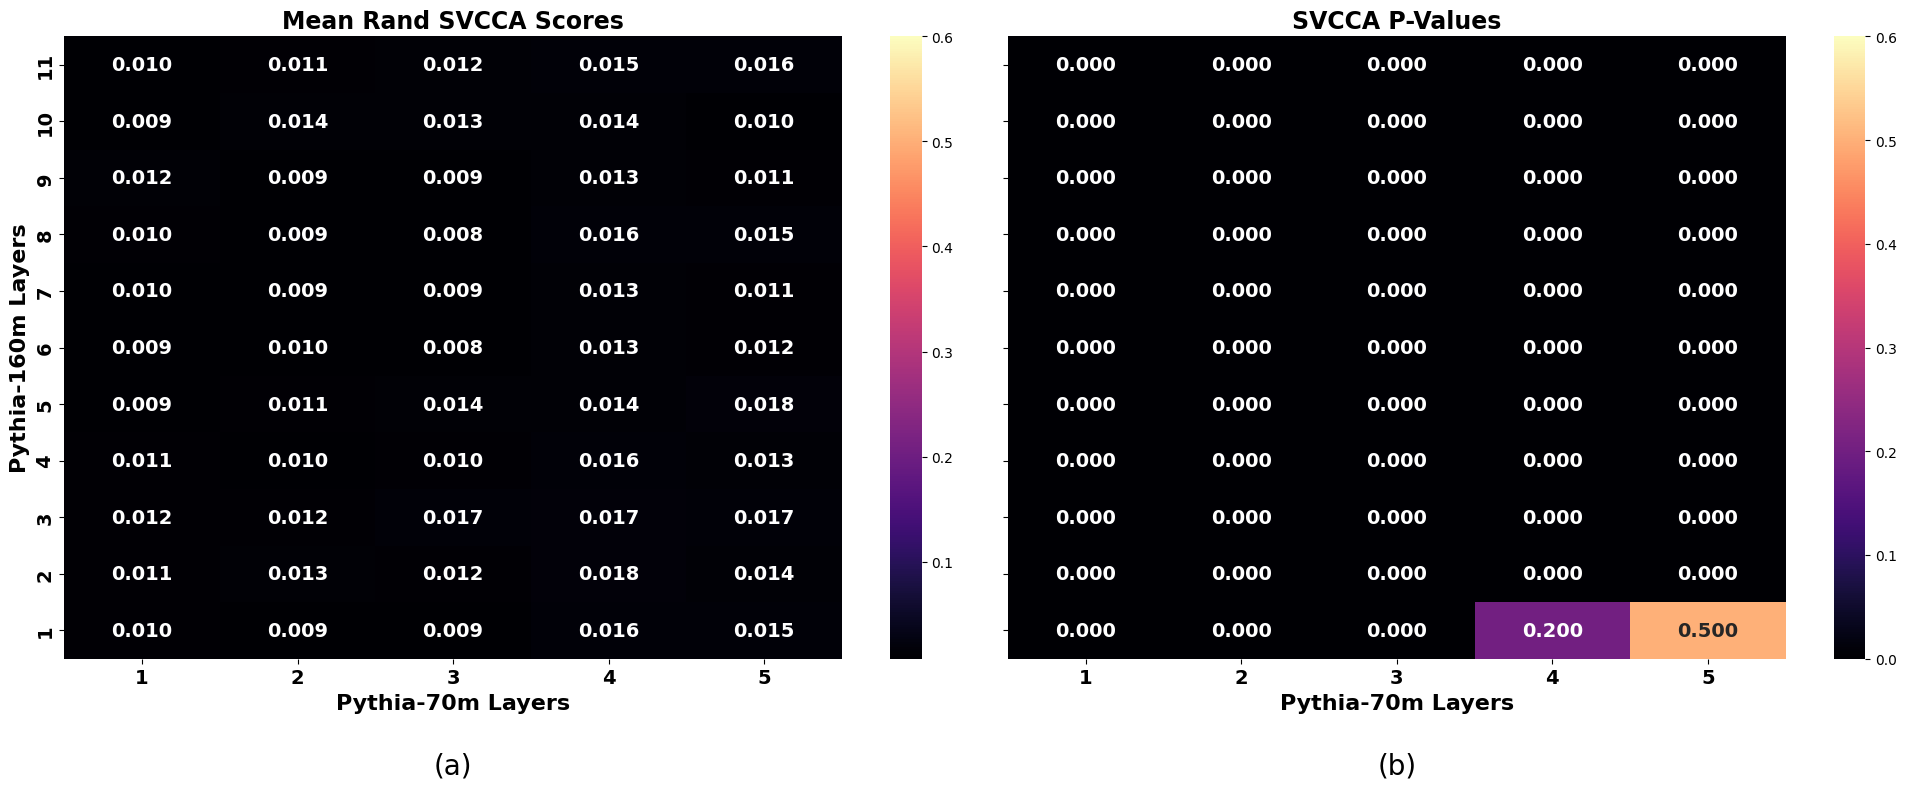

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Initialize dictionaries for the different scores
all_scores_paired_svcca = {}
all_scores_paired_rsa = {}

# Extract scores from the data structure
for layerID_A, layer_to_dictscores in all_scores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    layerID_A_scores_rsa = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0 and layerID_B != 25:
            svcca_score = scores_dict['svcca_rand_mean']
            rsa_score = scores_dict['svcca_rand_pval']
            layerID_A_scores_svcca[layerID_B] = svcca_score
            layerID_A_scores_rsa[layerID_B] = rsa_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca
    all_scores_paired_rsa[layerID_A] = layerID_A_scores_rsa

# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Customizing tick labels for bold and larger size
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Plot SVCCA heatmap with vmax set to 0.6
sns.heatmap(scores_df_svcca, ax=axes[0], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmax=0.6)  # Set vmax to 0.6
axes[0].set_title("Mean Rand SVCCA Scores", fontsize=17, fontweight='bold')
axes[0].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Pythia-160m Layers", fontsize=16, fontweight='bold')
axes[0].invert_yaxis()
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, ha='center', va='top', fontsize=20)

# Plot RSA heatmap with vmax set to 0.6
sns.heatmap(scores_df_rsa, ax=axes[1], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmax=0.6)  # Set vmax to 0.6
axes[1].set_title("SVCCA P-Values", fontsize=17, fontweight='bold')
axes[1].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[1].invert_yaxis()
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, ha='center', va='top', fontsize=20)

plt.tight_layout()

# Save the figure as a PDF and then download it
plt.savefig('heatmap_comparison.pdf')
plt.show()
files.download('heatmap_comparison.pdf')

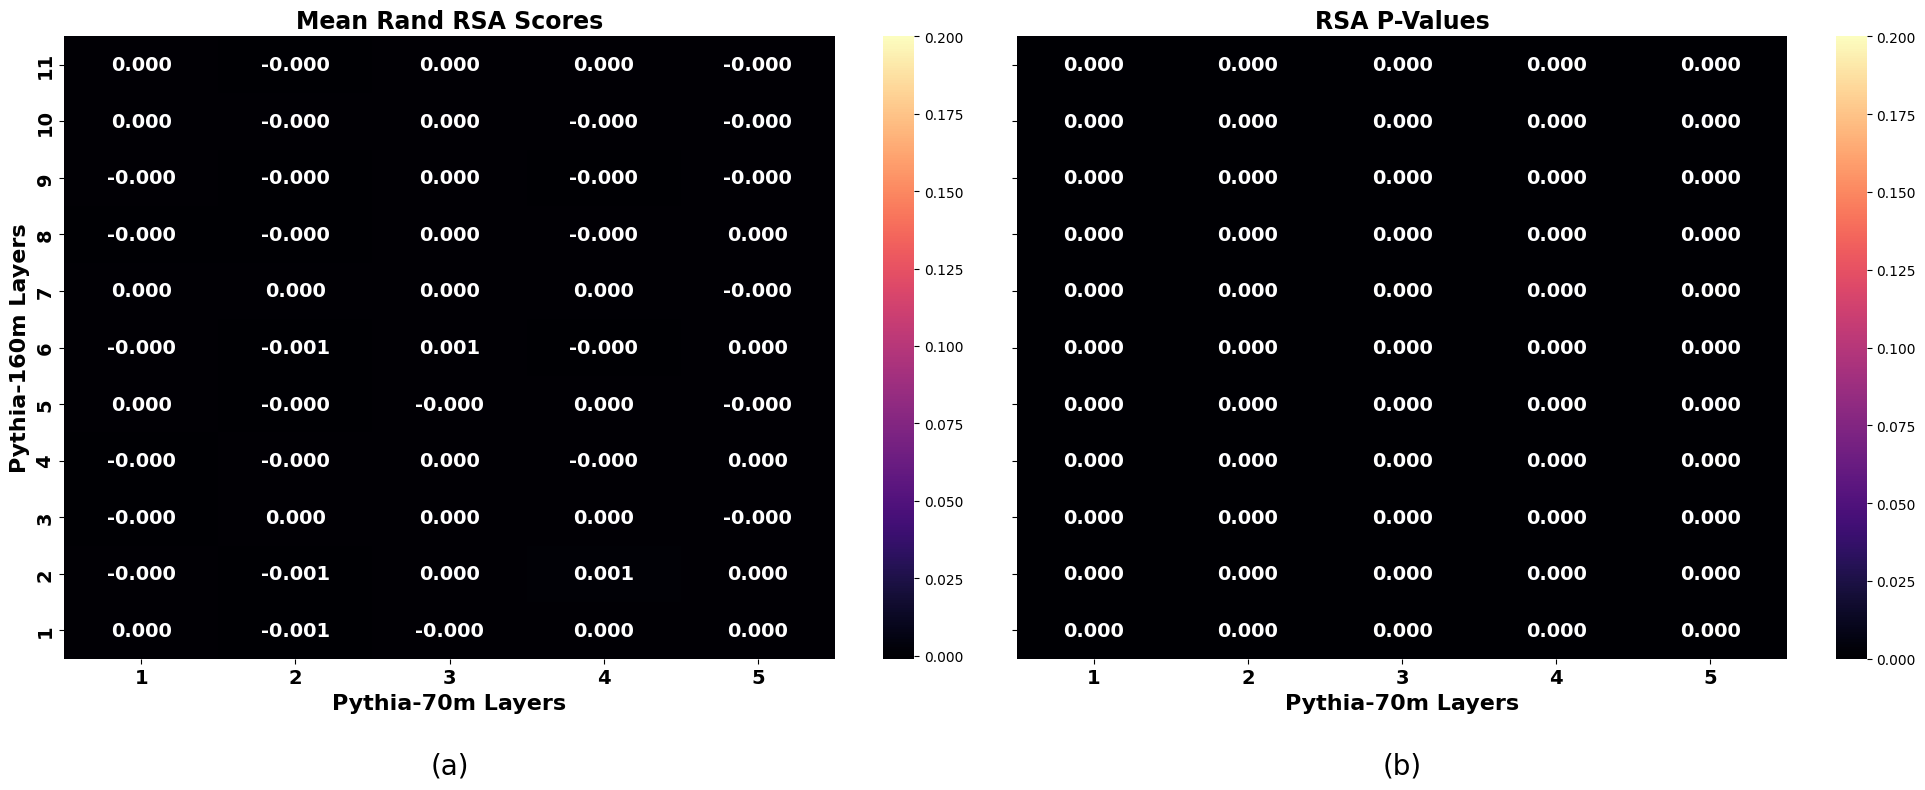

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Initialize dictionaries for the different scores
all_scores_paired_svcca = {}
all_scores_paired_rsa = {}

# Extract scores from the data structure
for layerID_A, layer_to_dictscores in all_scores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    layerID_A_scores_rsa = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0 and layerID_B != 25:
            svcca_score = scores_dict['rsa_rand_mean']
            rsa_score = scores_dict['rsa_rand_pval']
            layerID_A_scores_svcca[layerID_B] = svcca_score
            layerID_A_scores_rsa[layerID_B] = rsa_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca
    all_scores_paired_rsa[layerID_A] = layerID_A_scores_rsa

# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Customizing tick labels for bold and larger size
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Plot SVCCA heatmap with vmax set to 0.6
sns.heatmap(scores_df_svcca, ax=axes[0], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmax=0.2)  # Set vmax to 0.6
axes[0].set_title("Mean Rand RSA Scores", fontsize=17, fontweight='bold')
axes[0].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Pythia-160m Layers", fontsize=16, fontweight='bold')
axes[0].invert_yaxis()
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, ha='center', va='top', fontsize=20)

# Plot RSA heatmap with vmax set to 0.6
sns.heatmap(scores_df_rsa, ax=axes[1], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmax=0.2)  # Set vmax to 0.6
axes[1].set_title("RSA P-Values", fontsize=17, fontweight='bold')
axes[1].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[1].invert_yaxis()
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, ha='center', va='top', fontsize=20)

plt.tight_layout()

# Save the figure as a PDF and then download it
plt.savefig('heatmap_comparison.pdf')
plt.show()
files.download('heatmap_comparison.pdf')

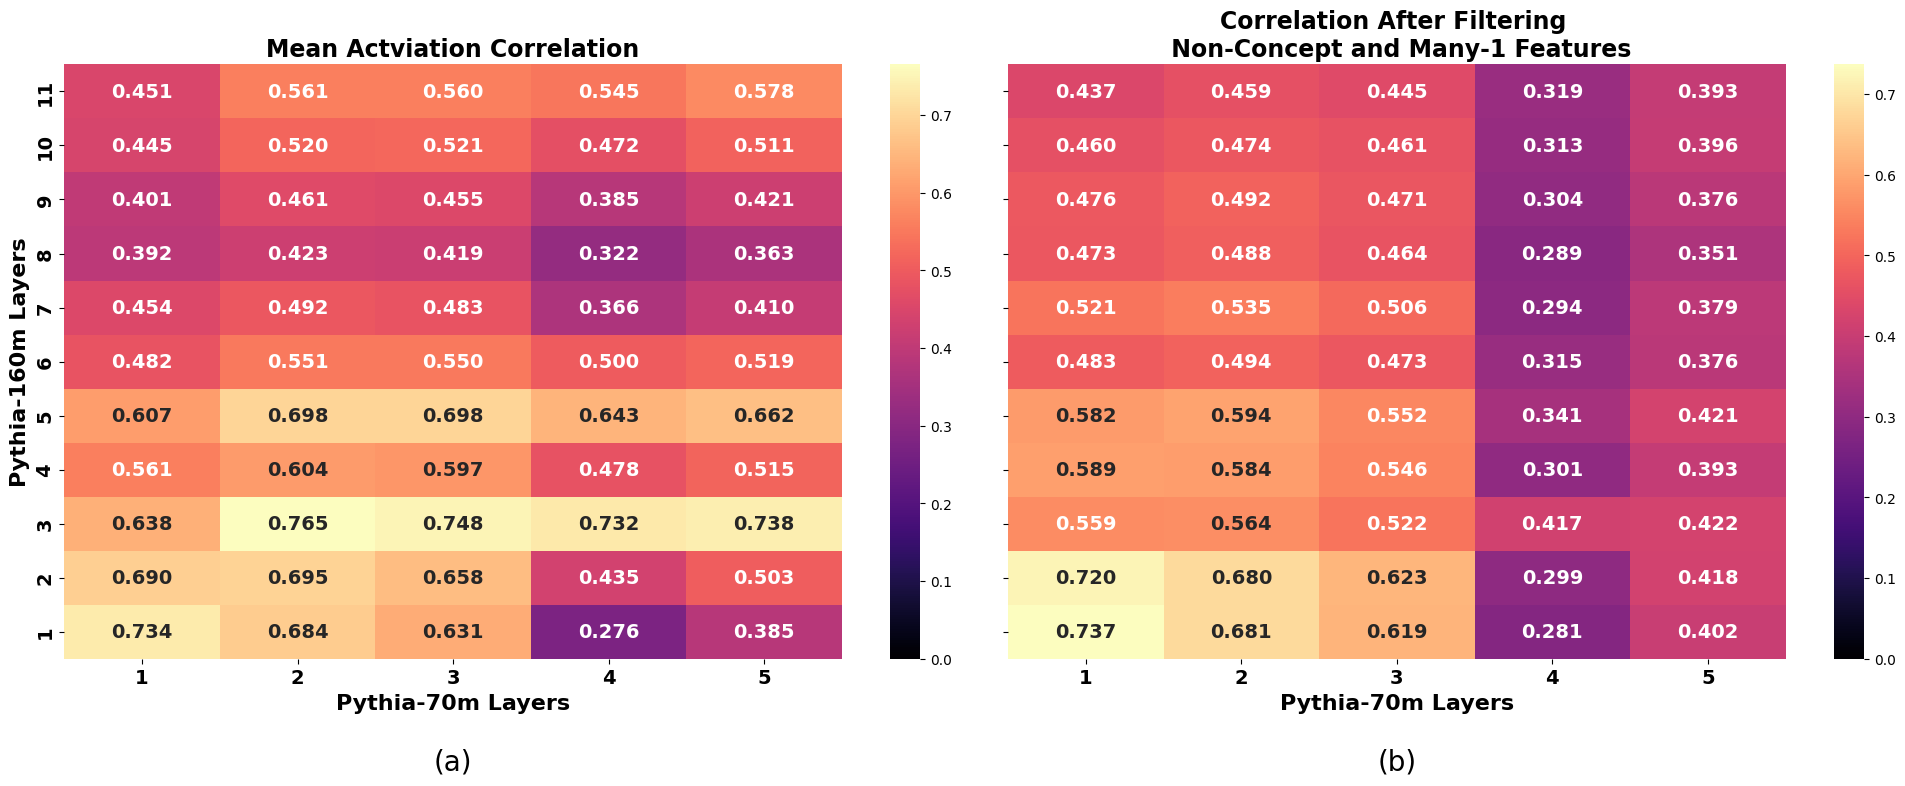

In [ ]:
# Initialize dictionaries for the different scores
all_scores_paired_svcca = {}
all_scores_paired_rsa = {}

# Extract scores from the data structure
for layerID_A, layer_to_dictscores in all_scores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    layerID_A_scores_rsa = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0 and layerID_B != 25:
            svcca_score = scores_dict['mean_actv_corr']
            rsa_score = scores_dict['mean_actv_corr_filt']
            layerID_A_scores_svcca[layerID_B] = svcca_score
            layerID_A_scores_rsa[layerID_B] = rsa_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca
    all_scores_paired_rsa[layerID_A] = layerID_A_scores_rsa

# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Customizing tick labels for bold and larger size
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Plot SVCCA heatmap with vmax set to 0.6
sns.heatmap(scores_df_svcca, ax=axes[0], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmin=0.0)  # Set vmax to 0.6
axes[0].set_title("Mean Actviation Correlation", fontsize=17, fontweight='bold')
axes[0].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Pythia-160m Layers", fontsize=16, fontweight='bold')
axes[0].invert_yaxis()
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, ha='center', va='top', fontsize=20)

# Plot RSA heatmap with vmax set to 0.6
sns.heatmap(scores_df_rsa, ax=axes[1], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmin=0.0)  # Set vmax to 0.6
axes[1].set_title("Correlation After Filtering \n Non-Concept and Many-1 Features", fontsize=17, fontweight='bold')
axes[1].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[1].invert_yaxis()
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, ha='center', va='top', fontsize=20)

plt.tight_layout()

# Save the figure as a PDF and then download it
plt.savefig('heatmap_comparison.pdf')
plt.show()

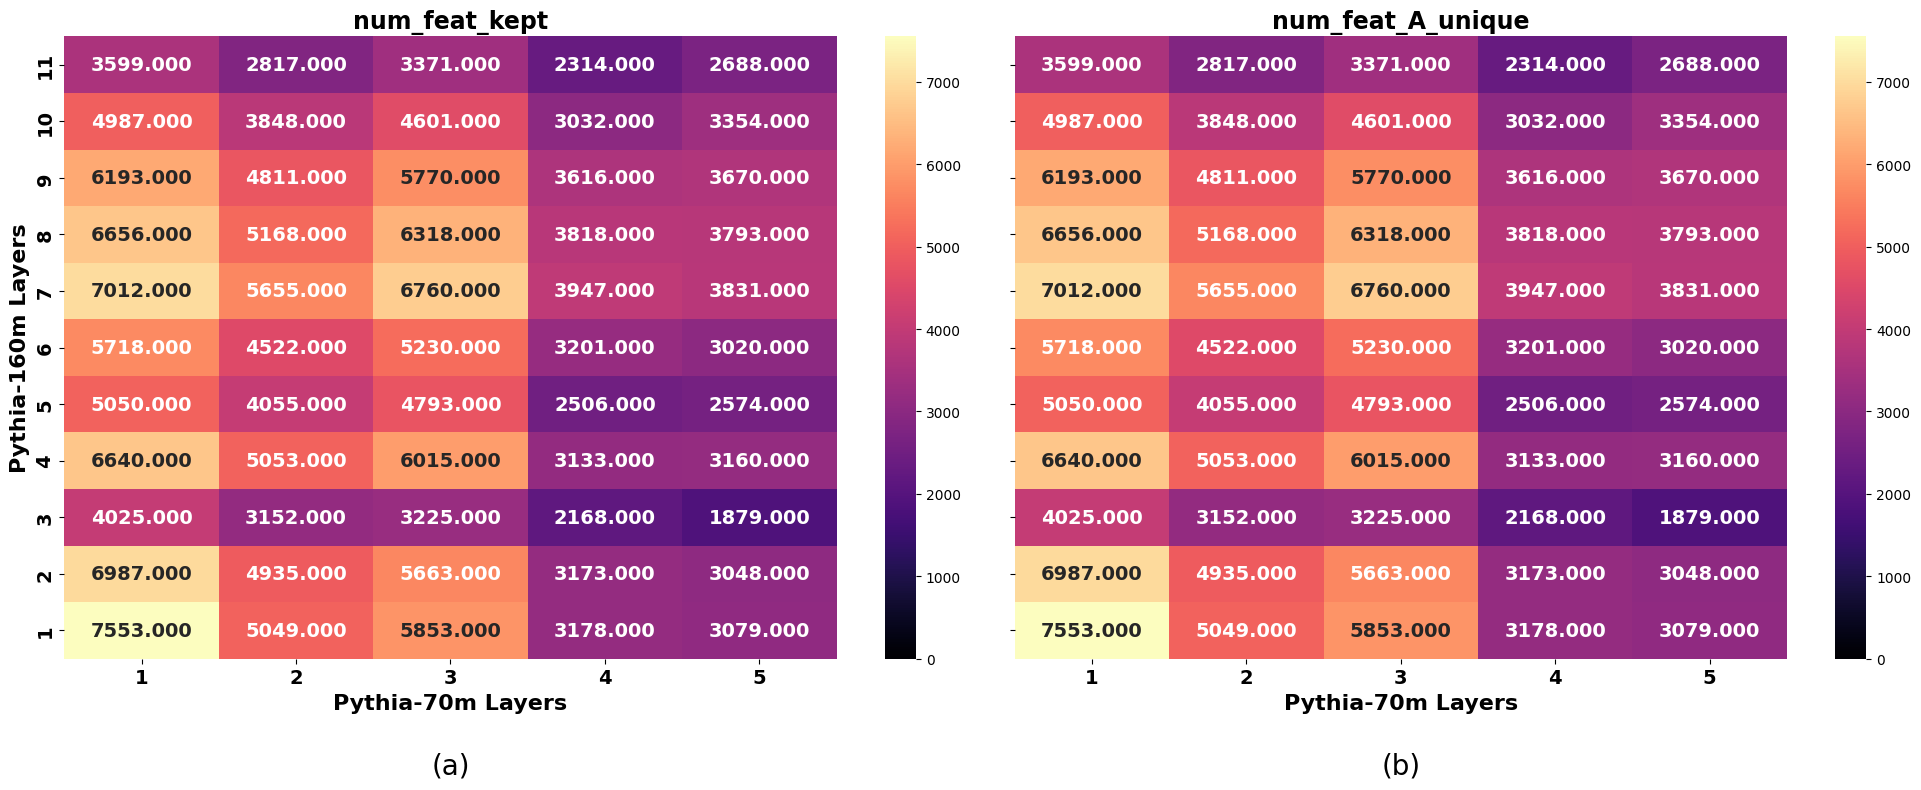

In [ ]:
# Initialize dictionaries for the different scores
all_scores_paired_svcca = {}
all_scores_paired_rsa = {}

# Extract scores from the data structure
for layerID_A, layer_to_dictscores in all_scores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    layerID_A_scores_rsa = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0 and layerID_B != 25:
            svcca_score = scores_dict['num_feat_kept']
            rsa_score = scores_dict['num_feat_A_unique']
            layerID_A_scores_svcca[layerID_B] = svcca_score
            layerID_A_scores_rsa[layerID_B] = rsa_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca
    all_scores_paired_rsa[layerID_A] = layerID_A_scores_rsa

# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Customizing tick labels for bold and larger size
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Plot SVCCA heatmap with vmax set to 0.6
sns.heatmap(scores_df_svcca, ax=axes[0], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmin=0.0)  # Set vmax to 0.6
axes[0].set_title("num_feat_kept", fontsize=17, fontweight='bold')
axes[0].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Pythia-160m Layers", fontsize=16, fontweight='bold')
axes[0].invert_yaxis()
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, ha='center', va='top', fontsize=20)

# Plot RSA heatmap with vmax set to 0.6
sns.heatmap(scores_df_rsa, ax=axes[1], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmin=0.0)  # Set vmax to 0.6
axes[1].set_title("num_feat_A_unique", fontsize=17, fontweight='bold')
axes[1].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[1].invert_yaxis()
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, ha='center', va='top', fontsize=20)

plt.tight_layout()

# Save the figure as a PDF and then download it
plt.savefig('heatmap_comparison.pdf')
plt.show()

# plot fns